In [82]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz --user
!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [83]:
import os
import numpy as np
import pandas as pd
import imblearn

In [84]:
df= pd.read_csv(r'C:\Users\zdehg\Downloads\archive\DASS_data_21.02.19\data.csv',  error_bad_lines=False, warn_bad_lines=False, sep=r'\t' )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [85]:
df.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
5,1,18,6116,1,28,3193,2,2,12542,1,...,2,1,1,4,1,70,2,1,4,None
6,1,20,4325,1,34,4009,2,38,3604,3,...,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng
7,1,34,4796,1,9,2618,1,39,5823,1,...,2,1,1,2,2,60,1,1,2,Music
8,4,4,3470,4,14,2139,3,1,11043,4,...,1,1,1,12,2,70,2,1,4,Psychology
9,3,38,5187,2,28,2600,4,9,2015,1,...,2,1,1,2,2,60,2,1,3,computer programming


In [86]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


In [87]:
df.drop(['Q1I', 'Q1E', 'Q2I', 'Q2E','Q3I', 'Q3E','Q4I', 'Q4E', 'Q5I', 'Q5E','Q6I', 'Q6E','Q7I', 'Q7E', 'Q8I', 'Q8E','Q9I', 'Q9E','Q10I', 'Q10E', 'Q11I', 'Q11E','Q12I', 'Q12E','Q13I', 'Q13E', 'Q14I', 'Q14E','Q15I', 'Q15E','Q16I', 'Q16E','Q17I', 'Q17E', 'Q18I', 'Q18E','Q19I', 'Q19E', 'Q20I', 'Q20E', 'Q21I', 'Q21E','Q22I', 'Q22E','Q23I', 'Q23E', 'Q24I', 'Q24E','Q25I', 'Q25E','Q26I', 'Q26E','Q27I', 'Q27E', 'Q28I', 'Q28E','Q29I', 'Q29E', 'Q30I', 'Q30E', 'Q31I', 'Q31E','Q32I', 'Q32E','Q33I', 'Q33E', 'Q34I', 'Q34E','Q35I', 'Q35E','Q36I', 'Q36E','Q37I', 'Q37E', 'Q38I', 'Q38E','Q39I', 'Q39E','Q40I', 'Q40E', 'Q41I', 'Q41E','Q42I', 'Q42E', 'source', 'introelapse', 'testelapse', 'surveyelapse'] , axis=1)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,1,1,12,1,10,2,1,2,None
1,4,1,2,3,4,4,3,4,3,2,...,2,1,2,7,0,70,2,1,4,None
2,3,1,4,1,4,3,1,3,2,4,...,2,1,1,4,3,60,1,1,3,None
3,2,3,2,1,3,3,4,2,3,3,...,2,1,2,4,5,70,2,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,1,1,2,4,60,2,1,2,None
39771,3,4,3,4,3,4,4,4,3,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,1,2,2,3,3,3,4,3,1,...,2,1,1,6,1,60,1,1,2,History


In [88]:
df = df[df['VCL6']==0]
df = df[df['VCL9']==0]
df = df[df['VCL12']==0]
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,None
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,None
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,None
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,3,32,28897,4,4,3025,2,30,3248,2,...,2,1,1,1,1,70,2,1,3,None
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,None
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [89]:
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}

DASS_bins = {'Depression': [(0, 10), (10, 14), (14, 21), (21, 28)],
             'Anxiety': [(0, 8), (8, 10), (10, 15), (15, 20)],
             'Stress': [(0, 15), (15, 19), (19, 26), (26, 34)]}
             

for name, keys in DASS_keys.items():
    # Subtract one to match definition of DASS score in source
    df[name] = (df.filter(regex='Q(%s)A' % '|'.join(map(str, keys))) - 1).sum(axis=1)
    
    bins = DASS_bins[name]
    bins.append( (DASS_bins[name][-1][-1], df[name].max() + 1) )
    bins = pd.IntervalIndex.from_tuples(bins, closed='left')
    df[name + '_cat'] = np.arange(len(bins))[pd.cut(df[name], bins=bins).cat.codes]
    
dass = df[DASS_keys.keys()]
dass_cat = df[[k + '_cat' for k in DASS_keys.keys()]]

In [90]:
# Add personality types to data
personality_types = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness']

# Invert some entries
tipi = df.filter(regex='TIPI\d+').copy()
tipi_inv = tipi.filter(regex='TIPI(2|4|6|8|10)').apply(lambda d: 7 - d)
tipi[tipi.columns.intersection(tipi_inv.columns)] = tipi_inv

# Calculate scores
for idx, pt in enumerate( personality_types ):
    df[pt] = tipi[['TIPI{}'.format(idx + 1), 'TIPI{}'.format(6 + idx)]].mean(axis=1)

personalities = df[personality_types]
personalities[['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness']].describe()

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
count,34583.000000,34583.000000,34583.000000,34583.000000,34583.000000
mean,2.971764,4.052237,3.716335,2.733973,4.057225
std,1.538398,1.213524,1.482219,1.514738,1.322600
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.500000,2.500000,1.500000,3.500000
50%,3.000000,4.000000,3.500000,2.500000,4.000000
75%,4.000000,5.000000,5.000000,3.500000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000


In [91]:
#extracting the questions of DASS out of dataset
only_q = df.filter(regex='Q\d{1,2}A')
only_q.head(10)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
5,1,1,2,1,3,1,1,3,3,2,...,4,1,3,2,2,2,1,1,1,2
6,1,1,2,3,4,1,3,3,3,4,...,4,3,2,2,4,4,4,2,2,3
9,3,2,4,1,4,4,3,4,4,4,...,4,4,3,4,4,4,4,4,3,4
10,3,1,2,1,3,3,1,3,1,1,...,1,2,3,1,1,2,3,1,1,2
11,3,3,2,2,4,3,1,3,4,3,...,4,3,2,3,1,2,4,3,1,2


In [92]:
only_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34583 entries, 0 to 39774
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1A     34583 non-null  int64
 1   Q2A     34583 non-null  int64
 2   Q3A     34583 non-null  int64
 3   Q4A     34583 non-null  int64
 4   Q5A     34583 non-null  int64
 5   Q6A     34583 non-null  int64
 6   Q7A     34583 non-null  int64
 7   Q8A     34583 non-null  int64
 8   Q9A     34583 non-null  int64
 9   Q10A    34583 non-null  int64
 10  Q11A    34583 non-null  int64
 11  Q12A    34583 non-null  int64
 12  Q13A    34583 non-null  int64
 13  Q14A    34583 non-null  int64
 14  Q15A    34583 non-null  int64
 15  Q16A    34583 non-null  int64
 16  Q17A    34583 non-null  int64
 17  Q18A    34583 non-null  int64
 18  Q19A    34583 non-null  int64
 19  Q20A    34583 non-null  int64
 20  Q21A    34583 non-null  int64
 21  Q22A    34583 non-null  int64
 22  Q23A    34583 non-null  int64
 23  Q24A    345

In [93]:
only_q.isnull().sum()

Q1A     0
Q2A     0
Q3A     0
Q4A     0
Q5A     0
Q6A     0
Q7A     0
Q8A     0
Q9A     0
Q10A    0
Q11A    0
Q12A    0
Q13A    0
Q14A    0
Q15A    0
Q16A    0
Q17A    0
Q18A    0
Q19A    0
Q20A    0
Q21A    0
Q22A    0
Q23A    0
Q24A    0
Q25A    0
Q26A    0
Q27A    0
Q28A    0
Q29A    0
Q30A    0
Q31A    0
Q32A    0
Q33A    0
Q34A    0
Q35A    0
Q36A    0
Q37A    0
Q38A    0
Q39A    0
Q40A    0
Q41A    0
Q42A    0
dtype: int64

In [94]:
only_t = df.filter(regex='TIPI\d+')
only_t

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,5,7,7,7,7,7,5,1,1
1,6,5,4,7,5,4,7,7,1,5
2,2,5,2,2,5,6,5,5,3,2
3,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3
...,...,...,...,...,...,...,...,...,...,...
39769,6,5,4,5,6,3,5,2,5,7
39770,2,2,3,5,6,5,5,3,3,6
39772,6,6,7,5,6,3,6,1,5,4
39773,1,6,5,7,3,5,3,5,3,4


In [95]:
only_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34583 entries, 0 to 39774
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TIPI1   34583 non-null  int64
 1   TIPI2   34583 non-null  int64
 2   TIPI3   34583 non-null  int64
 3   TIPI4   34583 non-null  int64
 4   TIPI5   34583 non-null  int64
 5   TIPI6   34583 non-null  int64
 6   TIPI7   34583 non-null  int64
 7   TIPI8   34583 non-null  int64
 8   TIPI9   34583 non-null  int64
 9   TIPI10  34583 non-null  int64
dtypes: int64(10)
memory usage: 2.9 MB


In [96]:
only_t.isnull().sum()

TIPI1     0
TIPI2     0
TIPI3     0
TIPI4     0
TIPI5     0
TIPI6     0
TIPI7     0
TIPI8     0
TIPI9     0
TIPI10    0
dtype: int64

In [97]:
import matplotlib.pyplot as plt

(array([[3741., 3152., 3300., 3629., 3490., 4057., 3189., 3091., 2950.,
         3984.],
        [4835., 4887., 4999., 4748., 4069., 4452., 2648., 1891., 1221.,
          833.],
        [1929., 2652., 3692., 4237., 4337., 5482., 4031., 3416., 2605.,
         2202.]]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 3 BarContainer objects>)

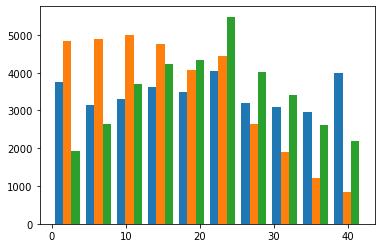

In [98]:
plt.hist(dass)
#It can be sen that this class variable is not imbalanced toward a certain result

Text(0.5, 1.0, 'dass boxplot')

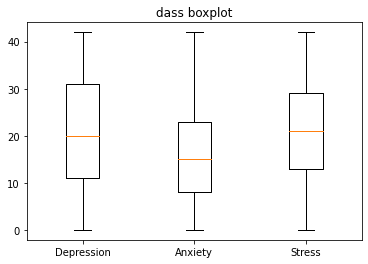

In [99]:
fig, axs = plt.subplots()
axs.boxplot(dass, labels = ['Depression', 'Anxiety','Stress'], )
axs.set_title('dass boxplot')

Text(0.5, 1.0, 'Personalities boxplot')

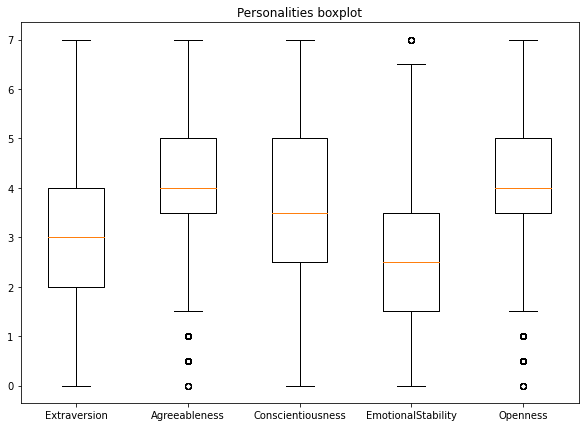

In [100]:
fig = plt.figure(figsize =(10, 7))
axs = fig.add_subplot(111)
axs.boxplot(personalities, labels= ['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness'])
axs.set_title('Personalities boxplot')

In [101]:
def plot_correlation(df, cmap='RdBu_r'):
    size = len(df.columns)
    fig, ax = plt.subplots(figsize=(2 * size,2 * size))
    corr = df.corr()

    im = ax.matshow(corr, cmap=cmap
                   )
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.5'))

    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar(im)
    ax.tick_params(labelsize=14)
    plt.show()

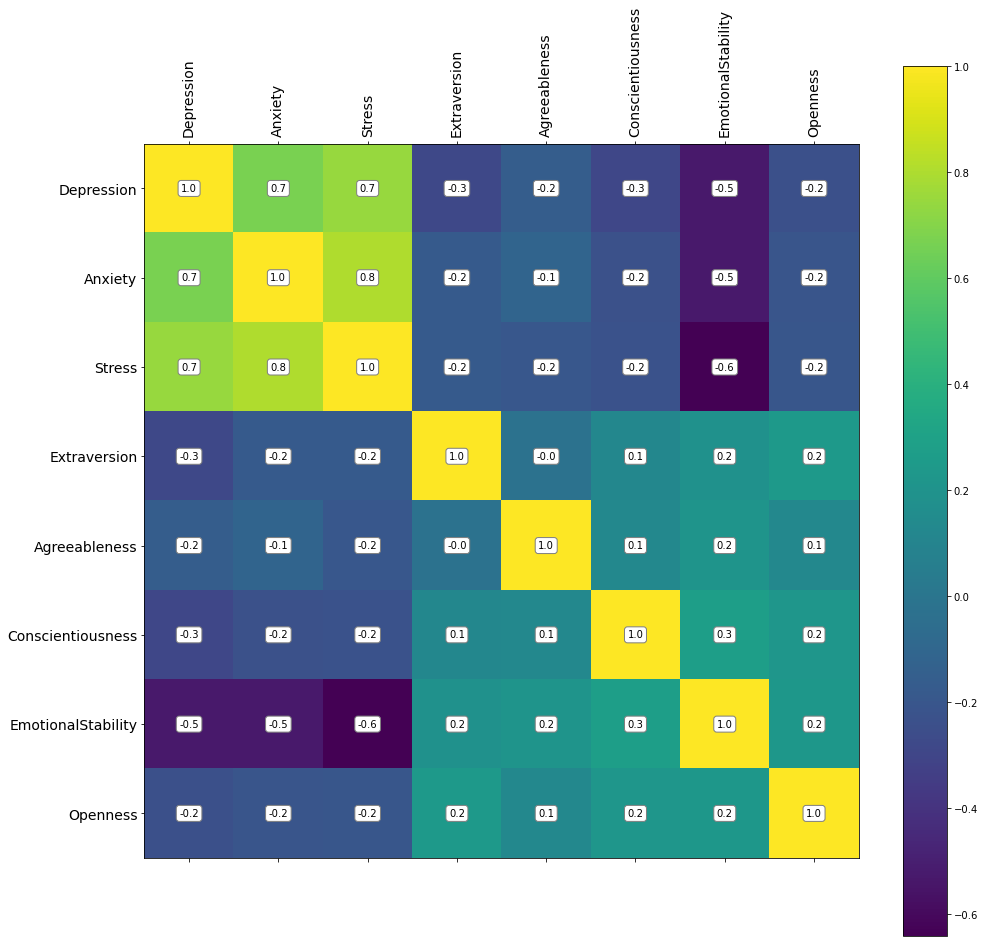

In [102]:
character = pd.concat([dass, personalities], axis=1)
plot_correlation(character, cmap='viridis')

In [103]:
def clasVar(df):
    conditions = [
    (df['Depression'] >= 14) ,
    (df['Anxiety'] >= 10)  ,
    (df['Stress'] >= 19), 
    ((df['Depression'] < 14)  & (df['Anxiety'] < 10) & (df['Stress'] < 19)),
    ]
    values = ['Depressed','axious', 'Stressed', 'Normal']
    df['diagnosis Category'] = np.select(conditions, values)
    return df

In [104]:
dfNew = clasVar(df)
dfNew.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Anxiety,Anxiety_cat,Stress,Stress_cat,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness,diagnosis Category
0,4,28,3890,4,25,2122,2,16,1944,4,...,34,4,40,4,0.5,4.5,4.5,0.5,6.5,Depressed
1,4,2,8118,1,36,2890,2,35,4777,3,...,17,3,27,3,4.5,4.5,2.0,0.5,3.5,Depressed
2,3,7,5784,1,33,4373,4,41,3242,1,...,12,2,17,1,1.5,3.5,2.0,4.0,5.0,Depressed
3,2,23,5081,3,11,6837,2,37,5521,1,...,17,3,16,1,2.0,6.0,6.5,4.5,6.0,Depressed
4,2,36,3215,2,13,7731,3,5,4156,4,...,40,4,29,3,2.0,3.5,2.0,2.0,4.5,Depressed
5,1,18,6116,1,28,3193,2,2,12542,1,...,6,0,12,0,1.0,6.5,5.5,6.0,3.5,Normal
6,1,20,4325,1,34,4009,2,38,3604,3,...,19,3,14,0,3.5,4.0,5.0,3.5,2.5,Depressed
9,3,38,5187,2,28,2600,4,9,2015,1,...,28,4,34,4,0.5,0.5,5.0,0.5,2.5,Depressed
10,3,38,3352,1,16,4322,2,28,3083,1,...,2,0,24,2,4.0,4.0,3.0,3.0,1.5,Depressed
11,3,37,4024,3,35,2116,2,18,3408,2,...,20,4,27,3,5.5,3.5,5.0,2.0,5.0,Depressed


In [105]:
dfNew = dfNew.loc[:,['Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness', 'diagnosis Category']]
dfNew

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness,diagnosis Category
0,0.5,4.5,4.5,0.5,6.5,Depressed
1,4.5,4.5,2.0,0.5,3.5,Depressed
2,1.5,3.5,2.0,4.0,5.0,Depressed
3,2.0,6.0,6.5,4.5,6.0,Depressed
4,2.0,3.5,2.0,2.0,4.5,Depressed
...,...,...,...,...,...,...
39769,5.0,3.5,4.5,3.5,3.0,Depressed
39770,2.0,5.0,3.5,2.5,3.5,Depressed
39772,5.0,3.5,6.5,3.5,4.5,Normal
39773,1.5,2.0,3.5,1.5,3.0,Depressed


(array([23503.,     0.,     0.,  6879.,     0.,     0.,  3754.,     0.,
            0.,   447.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

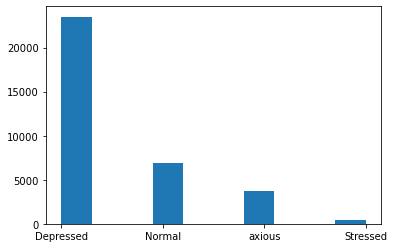

In [106]:
plt.hist(dfNew['diagnosis Category'])

In [107]:
dfNew.describe()

,Extraversion,Agreeableness,Conscientiousness,EmotionalStability,Openness
count,34583.000000,34583.000000,34583.000000,34583.000000,34583.000000
mean,2.971764,4.052237,3.716335,2.733973,4.057225
std,1.538398,1.213524,1.482219,1.514738,1.322600
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.500000,2.500000,1.500000,3.500000
50%,3.000000,4.000000,3.500000,2.500000,4.000000
75%,4.000000,5.000000,5.000000,3.500000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000


In [108]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

In [109]:
y = dfNew['diagnosis Category']
counter = Counter(y)
print(counter)

Counter({'Depressed': 23503, 'Normal': 6879, 'axious': 3754, 'Stressed': 447})


In [110]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[5])
dfNew_res, y_res = sm.fit_resample(dfNew, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({'Depressed': 23503, 'Normal': 23503, 'axious': 23503, 'Stressed': 23503})


In [111]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)
X=dfNew.columns[dfNew.columns != class_col_name]
for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index],X[test_index] 
      y_train, y_test =  y[train_index], y[test_index]

Train: [1 2 3 4] Validation: [0]
Train: [0 2 3 4] Validation: [1]
Train: [0 1 3 4] Validation: [2]
Train: [0 1 2 4] Validation: [3]
Train: [0 1 2 3] Validation: [4]


In [112]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# class column is Creditability here and everything else will be used as features 
class_col_name='diagnosis Category' 

feature_names=dfNew_res.columns[dfNew.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(dfNew_res.loc[:, feature_names], dfNew_res[class_col_name], test_size=0.25,random_state=1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(70509, 5) (70509,) (23503, 5) (23503,)


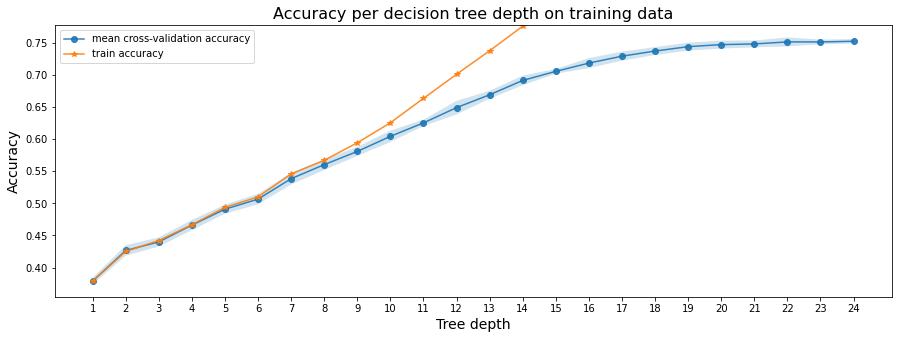

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
X = dfNew_res
y = y_res
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [114]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-24 tree achieves the best mean cross-validation accuracy 75.20316 +/- 0.17681% on training dataset


In [115]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 24-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  24
Accuracy, Training Set:  96.86848 %
Accuracy, Test Set:  76.37323 %


In [116]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
clf = DecisionTreeClassifier(random_state=0 , max_depth=24)
decision_tree = clf.fit(X_train, y_train)
r = export_text(decision_tree, feature_names= ('Extraversion', 'Agreeableness', 'Conscientiousness', 'EmotionalStability', 'Openness'))
print(r)

|--- EmotionalStability <= 3.50
|   |--- EmotionalStability <= 1.00
|   |   |--- EmotionalStability <= 0.50
|   |   |   |--- Openness <= 6.00
|   |   |   |   |--- Conscientiousness <= 3.52
|   |   |   |   |   |--- Extraversion <= 4.01
|   |   |   |   |   |   |--- Agreeableness <= 1.99
|   |   |   |   |   |   |   |--- Agreeableness <= 1.50
|   |   |   |   |   |   |   |   |--- Extraversion <= 2.75
|   |   |   |   |   |   |   |   |   |--- Conscientiousness <= 1.63
|   |   |   |   |   |   |   |   |   |   |--- class: Depressed
|   |   |   |   |   |   |   |   |   |--- Conscientiousness >  1.63
|   |   |   |   |   |   |   |   |   |   |--- Conscientiousness <= 1.99
|   |   |   |   |   |   |   |   |   |   |   |--- class: Normal
|   |   |   |   |   |   |   |   |   |   |--- Conscientiousness >  1.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |--- Extraversion >  2.75
|   |   |   |   |   |   |   |   |   |--- Extraversion <= 3.25
|  

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4450  816   95  574]
 [ 884 4047  175  763]
 [ 101  183 5446  156]
 [ 771  781  232 4029]]
              precision    recall  f1-score   support

   Depressed       0.72      0.75      0.73      5935
      Normal       0.69      0.69      0.69      5869
    Stressed       0.92      0.93      0.92      5886
      axious       0.73      0.69      0.71      5813

    accuracy                           0.76     23503
   macro avg       0.76      0.76      0.76     23503
weighted avg       0.76      0.76      0.76     23503



C:\Users\zdehg\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.46662128238948225
              precision    recall  f1-score   support

   Depressed       0.49      0.55      0.52      5935
      Normal       0.53      0.58      0.56      5869
    Stressed       0.45      0.46      0.45      5886
      axious       0.36      0.27      0.31      5813

    accuracy                           0.47     23503
   macro avg       0.46      0.47      0.46     23503
weighted avg       0.46      0.47      0.46     23503



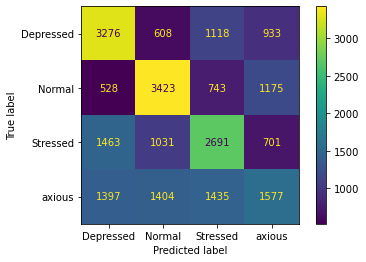

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
model_d = GaussianNB()
model_d.fit(X_train,y_train)
plot_confusion_matrix(model_d, X_test, y_test)
predictions = model_d.predict(X_test)
print(f1_score(y_test,predictions, average = 'micro'))
print(classification_report(y_test,predictions))

C:\Users\zdehg\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8174275624388376
              precision    recall  f1-score   support

   Depressed       0.78      0.57      0.66      5935
      Normal       0.81      0.84      0.83      5869
    Stressed       0.89      0.98      0.93      5886
      axious       0.77      0.88      0.83      5813

    accuracy                           0.82     23503
   macro avg       0.81      0.82      0.81     23503
weighted avg       0.81      0.82      0.81     23503



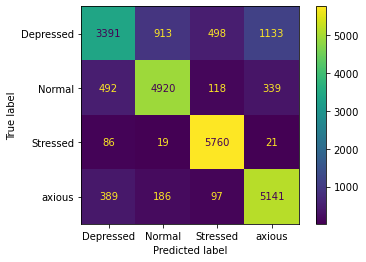

In [125]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)
plot_confusion_matrix(model2, X_test, y_test)
predictions = model2.predict(X_test)
print(f1_score(y_test,predictions, average = 'micro'))
print(classification_report(y_test,predictions))

C:\Users\zdehg\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8479343062587755
              precision    recall  f1-score   support

   Depressed       0.79      0.82      0.81      5935
      Normal       0.79      0.80      0.80      5869
    Stressed       0.95      0.97      0.96      5886
      axious       0.85      0.80      0.82      5813

    accuracy                           0.85     23503
   macro avg       0.85      0.85      0.85     23503
weighted avg       0.85      0.85      0.85     23503



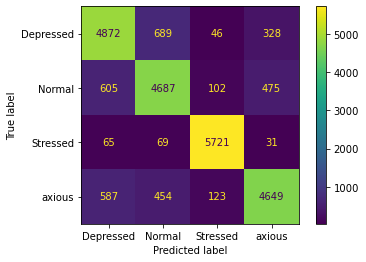

In [126]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=0)
model1.fit(X_train,y_train)
plot_confusion_matrix(model1, X_test, y_test)
predictions = model1.predict(X_test)
print(f1_score(y_test,predictions, average = 'micro'))
print(classification_report(y_test,predictions))